After data cleaning, lets open the file.
I've saved the clean data it in two formats:
* The original format (csv) - With a dictionary with the optimal types of each column to make easier open it.

* In parquet format, that is used to manage big amounts of data.

Obviously, parquet format is faster, after checking it, its 4 times faster. Therefore, I will use it. However, I will leave the procedure of opening the file with .pickle  dictionary and the procedure to open the full file for those have a powerful engine as markdown.

In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt


##### How to open the csv file with .pickle dictionary

import pickle

with open('./data/fileformat.pickle', 'rb') as handle:
    file_format = pickle.load(handle)
file_format

bank = pd.read_csv('./data/clean_train.csv', dtype=file_format)
bank.head()

##### How to open entire dataframe with parquet

%%time

table2 = pq.read_table('./data/clean_train.parquet')
bank = table2.to_pandas()

### Now, I open the sample dataframe to create my model

In [2]:
%%time

table2 = pq.read_table('./data/clean_train_sample.parquet')
bank = table2.to_pandas()

CPU times: user 2.05 s, sys: 382 ms, total: 2.43 s
Wall time: 721 ms


/home/alfonso/miniconda3/envs/kaggle/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/alfonso/miniconda3/envs/kaggle/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/alfonso/miniconda3/envs/kaggle/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045683 entries, 2512427 to 3776492
Data columns (total 47 columns):
fecha_dato               1045683 non-null object
ncodpers                 1045683 non-null int32
ind_empleado             1045683 non-null object
pais_residencia          1045683 non-null object
sexo                     1045683 non-null object
age                      1045683 non-null int8
fecha_alta               1045683 non-null object
ind_nuevo                1045683 non-null float32
antiguedad               1045683 non-null int16
indrel                   1045683 non-null float32
ult_fec_cli_1t           1045683 non-null object
indrel_1mes              1045683 non-null object
tiprel_1mes              1045683 non-null object
indresi                  1045683 non-null object
indext                   1045683 non-null object
conyuemp                 1045683 non-null object
canal_entrada            1045683 non-null object
indfall                  1045683 non-null object
t

In [16]:
bank.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2512427,2015-05-28,1061260,N,ES,H,24,2012-09-17,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512428,2015-05-28,1061283,N,ES,H,22,2012-09-17,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512430,2015-05-28,1061336,N,ES,H,23,2012-09-17,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512431,2015-05-28,1061286,N,ES,V,29,2012-09-17,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2512433,2015-05-28,1061288,N,ES,V,28,2012-09-17,0.0,34,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


After data cleaning, we have to process our data in order to make a good model.

First, lets change the types of each column to ease the process, then I will use a distance matrix

In [5]:
bank['fecha_dato'] = pd.to_datetime(bank['fecha_dato'], errors='coerce', infer_datetime_format=True, format="%Y-%m-%d")
bank['fecha_alta'] = pd.to_datetime(bank['fecha_alta'], errors='coerce', infer_datetime_format=True, format="%Y-%m-%d")

In [6]:
obj_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 
            'indext', 'conyuemp', 'canal_entrada', 'indfall', 'nomprov', 'segmento']

for col in obj_cols:
    bank[col] = bank[col].astype('category')

In [7]:
bank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045683 entries, 2512427 to 3776492
Data columns (total 47 columns):
fecha_dato               1045683 non-null datetime64[ns]
ncodpers                 1045683 non-null int32
ind_empleado             1045683 non-null category
pais_residencia          1045683 non-null category
sexo                     1045683 non-null category
age                      1045683 non-null int8
fecha_alta               1045683 non-null datetime64[ns]
ind_nuevo                1045683 non-null float32
antiguedad               1045683 non-null int16
indrel                   1045683 non-null float32
ult_fec_cli_1t           1045683 non-null category
indrel_1mes              1045683 non-null category
tiprel_1mes              1045683 non-null category
indresi                  1045683 non-null category
indext                   1045683 non-null category
conyuemp                 1045683 non-null category
canal_entrada            1045683 non-null category
indfall       

In [8]:
bank.shape

(1045683, 47)

Let's check relationships between values:

In [9]:
correlation = bank.corr(method='pearson', min_periods=1)

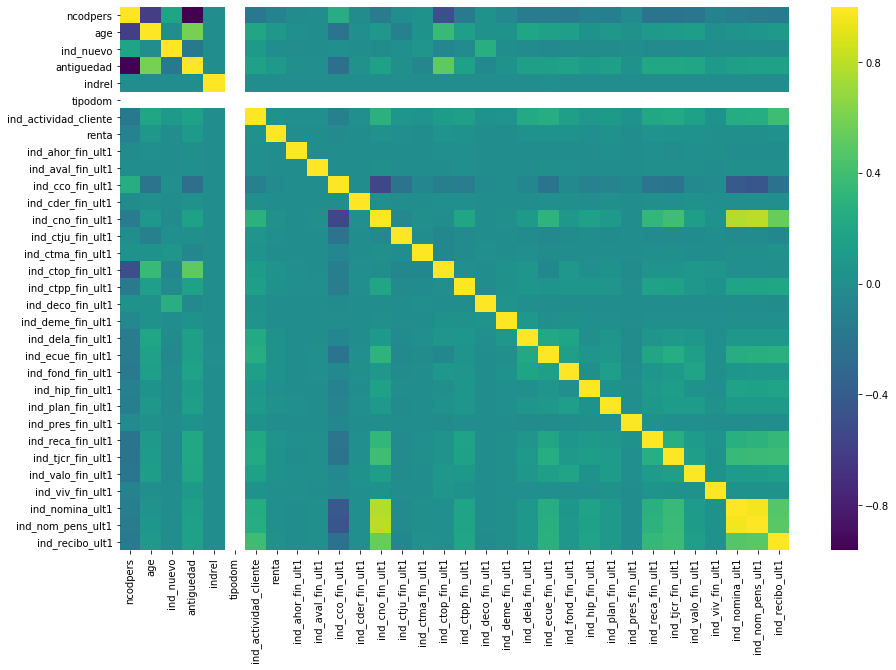

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cmap='viridis');

In [18]:
bank["Month_ID"] = bank["fecha_dato"].dt.month

In [20]:
bank["Month_ID"].unique()

array([5, 6])

Lets remember which unique values we have:

In [26]:
all_columns = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
for col in all_columns:
    print(col, '- num unique values:', bank[col].nunique(), '\n val_counts:', bank[col].value_counts(), '\n\n Unique values:', bank[col].unique(), '\n\n')

fecha_dato - num unique values: 2 
 val_counts: 2015-06-28    523665
2015-05-28    522018
Name: fecha_dato, dtype: int64 

 Unique values: ['2015-05-28T00:00:00.000000000' '2015-06-28T00:00:00.000000000'] 


ncodpers - num unique values: 524948 
 val_counts: 1050623    2
89216      2
416864     2
423013     2
406637     2
402543     2
443507     2
221814     2
453750     2
451703     2
433272     2
431225     2
495573     2
437374     2
435327     2
85122      2
502878     2
1131651    2
1145988    2
1143941    2
1141894    2
1139847    2
72840      2
1117322    2
78989      2
1125518    2
1170576    2
1166482    2
115859     2
1178772    2
          ..
768389     1
1401507    1
632900     1
1400138    1
1402729    1
782732     1
1402467    1
571589     1
1399927    1
1401760    1
1400883    1
1402546    1
1399407    1
514148     1
835689     1
1402672    1
1401573    1
255592     1
676144     1
1400895    1
582909     1
940096     1
956543     1
1399966    1
880988     1
1401429    1


renta - num unique values: 402246 
 val_counts: 451931.218750    557
463625.156250    169
181042.203125    163
128318.523438    136
488798.500000    136
283325.656250    126
127141.500000    125
105260.882812    120
132335.734375    104
273387.531250     94
227267.484375     91
236690.343750     90
104563.796875     88
218030.015625     82
174407.093750     80
227397.718750     78
111933.687500     78
163432.468750     77
155930.437500     77
555605.562500     72
208961.796875     70
148736.187500     68
288997.437500     68
168733.625000     68
135522.156250     66
248233.109375     66
152601.984375     66
47550.390625      62
140312.734375     62
250583.093750     62
                ... 
68068.710938       1
89202.960938       1
76081.531250       1
95236.382812       1
368704.000000      1
136705.500000      1
85665.812500       1
63069.328125       1
72994.890625       1
97381.203125       1
50753.968750       1
80751.601562       1
202257.328125      1
95153.757812       1
43097.4

Now, lets create a dictionary for each feature so that mapping them to correct value is easier.

In [30]:
feature_dict = {'ind_empleado':{'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
                'pais_residencia' : {'ES': 0, 'MX': 1, 'IT': 2, 'PA': 3, 'DE': 4, 'BO': 5, 'BE': 6, 'PY': 7},
                'sexo':{'V':0, 'H':1, 'UNKNOWN':2},
                'ind_nuevo':{'0.0':0, '1.0':1},
                'indrel':{'1':0, '99':1},
                'tiprel_1mes':{'I':1, 'A':2, 'P':3},
                'indresi':{'S':1, 'N':2},
                'indext':{'S':1, 'N':2},
                'conyuemp':{'S':1, 'N':2},
                'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118, 'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59, 'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151, 'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, -99: 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24, 'KGC': 18, 'KGN': 11},
                'indfall': {'S':1, 'N':2},
                'tipodom':{'1.0':1},
                'ind_actividad_cliente':{'0.0':0, '1.0':1},
                'segmento':{'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, 'UNKNOWN':3},
}
cat_cols = list(feature_dict.keys())

Since recommending the smallest classes wastes recommendations, I need to analyze which products are the most purchased and which are the least purchased

In [31]:
cols_in = ['fecha_dato', 'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
bank_prods = bank.loc[:,cols_in]

In [33]:
bank_prods["Month_ID"] = bank_prods["fecha_dato"].dt.month
bank_prods.drop("fecha_dato", inplace=True, axis=1)
bank_prods.shape

(1045683, 26)

In [35]:
target = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
print(len(target))

train2 = pd.melt(bank_prods, id_vars=["ncodpers", "Month_ID"], value_vars=target,var_name="Product", value_name="Product_flag" )
train2.head()

24


,ncodpers,Month_ID,Product,Product_flag
0,1061260,5,ind_ahor_fin_ult1,0.0
1,1061283,5,ind_ahor_fin_ult1,0.0
2,1061336,5,ind_ahor_fin_ult1,0.0
3,1061286,5,ind_ahor_fin_ult1,0.0
4,1061288,5,ind_ahor_fin_ult1,0.0


In [36]:
train2['Product_flag'].value_counts()

0.0    23187147
1.0     1909245
Name: Product_flag, dtype: int64

In [37]:
train2 = train2.loc[train2["Product_flag"] == 1.0]
train2.shape

(1909245, 4)

In [39]:
train3 = train2.pivot_table(values="Product_flag", index=["ncodpers", "Product"], columns='Month_ID')
train3.head()

Month_ID                      5    6
ncodpers Product                    
15889    ind_cco_fin_ult1   1.0  1.0
         ind_ctpp_fin_ult1  1.0  1.0
         ind_tjcr_fin_ult1  1.0  1.0
         ind_valo_fin_ult1  1.0  1.0
15890    ind_cno_fin_ult1   1.0  1.0

In [43]:
train3.reset_index(inplace=True)
train3.rename_axis("ID")
train3.rename(columns={5:"Month_5", 6:"Month_6"}, inplace=True)

train3.Month_5.replace(np.NaN, 0.0, inplace=True)
train3.Month_6.replace(np.NaN, 0.0, inplace=True)
train3.isnull().sum()

Month_ID
ncodpers    0
Product     0
Month_5     0
Month_6     0
dtype: int64

In [46]:
# Total products added

Jun15_additions = train3.loc[(train3["Month_5"] == 0.0) & (train3["Month_6"] == 1.0)]
Jun15_additions.shape

(39487, 4)

In [48]:
#Total unique customers that has bought a new product
Jun15_additions["ncodpers"].nunique()
t = Jun15_additions.pivot(index="ncodpers", values="Month_6", columns="Product")
t["ncodpers"] = t.index
t.shape

(31682, 23)

In [53]:
t.reset_index(drop=True,inplace=True)
t.fillna(0,inplace=True)
t["Total_new_prods"] = t.sum(axis=1) - t["ncodpers"]
print (t['Total_new_prods'].value_counts())
t.head()

4.0     25393
8.0      4924
12.0     1222
16.0      135
20.0        8
Name: Total_new_prods, dtype: int64


Product,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_dela_fin_ult1,ind_deme_fin_ult1,...,ind_nomina_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_recibo_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ncodpers,Total_new_prods
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15892,4.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15896,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15897,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15906,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15925,4.0


In [57]:
# List of products purchased

target_cols = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_dela_fin_ult1',
       'ind_deme_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_recibo_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1']

In [72]:
t[t==1.0].count(axis=0)

Product
ind_cco_fin_ult1     8033
ind_cder_fin_ult1       8
ind_cno_fin_ult1     1686
ind_ctju_fin_ult1      50
ind_ctma_fin_ult1     289
ind_ctop_fin_ult1     196
ind_ctpp_fin_ult1     144
ind_deco_fin_ult1     406
ind_dela_fin_ult1     935
ind_deme_fin_ult1      30
ind_ecue_fin_ult1    1024
ind_fond_fin_ult1     208
ind_hip_fin_ult1        3
ind_nom_pens_ult1    7217
ind_nomina_ult1      4512
ind_plan_fin_ult1      19
ind_pres_fin_ult1       7
ind_reca_fin_ult1    2604
ind_recibo_ult1      7857
ind_tjcr_fin_ult1    4116
ind_valo_fin_ult1     140
ind_viv_fin_ult1        3
ncodpers                0
Total_new_prods         0
dtype: int64